In [1]:
import os
import ast
import pytz
import json
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling

In [2]:
def import_data(filename):
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    name,ext = os.path.splitext(filename)
    if ext == '.csv':
        data = pd.read_csv(filename,low_memory=False,parse_dates= True,infer_datetime_format = True,date_parser = dateparse)
    if ext == '.json':
        data = pd.read_json(filename)
    if ext =='.xlsx' or ext == '.xls':
        data == pd.read_excel(filename)
    return data

In [3]:
train = import_data("/home/divyanka/Downloads/train_s3TEQDk.csv")

In [4]:
test  = import_data("/home/divyanka/Downloads/test_mSzZ8RL.csv")

In [64]:
from IPython.core.display import HTML
display(HTML(train.head().to_html()))

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [65]:
from IPython.core.display import HTML
display(HTML(test.head().to_html()))

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [66]:
train.shape

(245725, 11)

In [67]:
test.shape

(105312, 10)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [70]:
pfr = pandas_profiling.ProfileReport(train)

/home/divyanka/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [71]:
pfr

Number of variables,11
Number of observations,245725
Total Missing (%),1.1%
Total size in memory,20.6 MiB
Average record size in memory,88.0 B
Numeric,3
Categorical,6
Boolean,1
Date,0
Text (Unique),1
Rejected,0


# Feature Importance

In [5]:
from sklearn.ensemble import RandomForestClassifier #, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt 
#import statsmodels.formula.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import seaborn as sns
from numpy import set_printoptions
from sklearn import preprocessing

In [57]:
train.ID.unique().tolist()

[179194,
 131013,
 121520,
 57273,
 209602,
 45764,
 94961,
 139850,
 243331,
 181870,
 181762,
 118469,
 99841,
 147974,
 92273,
 215781,
 71035,
 220850,
 121725,
 56718,
 30279,
 24080,
 180575,
 228982,
 136019,
 59308,
 209635,
 150847,
 75691,
 149570,
 210220,
 45320,
 35582,
 190274,
 107211,
 189486,
 170317,
 47010,
 84867,
 32851,
 26395,
 114494,
 202623,
 37715,
 215254,
 23003,
 225795,
 87109,
 7076,
 92727,
 197323,
 150934,
 125878,
 140471,
 158617,
 109469,
 172354,
 155845,
 33833,
 142055,
 58257,
 176407,
 155169,
 192798,
 13485,
 194268,
 59863,
 115480,
 139293,
 46597,
 241797,
 128783,
 33830,
 117533,
 99547,
 10033,
 24931,
 51136,
 201908,
 218555,
 91501,
 16825,
 192205,
 198127,
 125655,
 162867,
 11462,
 225055,
 234405,
 185243,
 104743,
 178150,
 209747,
 135242,
 55493,
 88191,
 70261,
 2944,
 22062,
 85754,
 883,
 53211,
 69042,
 166384,
 214586,
 244657,
 6804,
 111220,
 86153,
 120086,
 108022,
 125266,
 150795,
 136674,
 209343,
 32736,
 118787,

In [32]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [108]:
train.Is_Lead.unique()

array([0, 1])

In [6]:
train['Credit_Product'] = train['Credit_Product'].fillna(0)

In [8]:
train['Credit_Product'] = train['Credit_Product'].replace(0,m.iloc[0])

In [7]:
m = train['Credit_Product'].mode()

In [9]:
test['Credit_Product'] = test['Credit_Product'].fillna(0)
m = test['Credit_Product'].mode()
test['Credit_Product'] = test['Credit_Product'].replace(0,m.iloc[0])

In [167]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [77]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,No
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,No
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,No
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,No
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,No


In [10]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in train.columns:
    # Compare if the dtype is object
    if col == 'ID':
        continue
    if train[col].dtypes=='object':
        print(col)
    # Use LabelEncoder to do the numeric transformation
        train[col]=le.fit_transform(train[col])

Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


In [11]:
for col in test.columns:
    # Compare if the dtype is object
    if col == 'ID':
        continue
    if test[col].dtypes=='object':
        print(col)
    # Use LabelEncoder to do the numeric transformation
        test[col]=le.fit_transform(test[col])

Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


In [107]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [169]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,4,1,0,25,1,742366,0
1,CCMEWNKY,1,43,18,1,1,49,0,925537,0
2,VK3KGA9M,1,31,20,2,0,14,0,215949,0
3,TT8RPZVC,1,29,22,1,0,33,0,868070,0
4,SHQZEYTZ,0,29,20,1,0,19,0,657087,0


In [118]:
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0
5,ACUTYTWS,1,56,11,3,0,32,0,544163,1,0
6,ETQCZFEJ,1,62,32,1,2,20,0,1056750,1,1
7,JJNJUQMQ,0,48,15,3,2,13,0,444724,1,0
8,ZMQFYKCB,0,40,33,3,1,38,0,1274284,0,0
9,NVKTFBA2,0,55,18,3,1,49,1,2014239,0,0


In [13]:
train1 = train.drop('ID',axis=1)

In [14]:
#train_ = train1.values
#X, y = train_[:, :-1], train_[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [126]:
train_

array([[      0,      73,      18, ..., 1045696,       0,       0],
       [      0,      30,      27, ...,  581988,       0,       0],
       [      0,      56,      18, ..., 1484315,       1,       0],
       ...,
       [      0,      26,      31, ...,  670659,       0,       0],
       [      0,      28,      23, ...,  407504,       0,       0],
       [      1,      29,      19, ..., 1129276,       0,       0]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [46]:
selector = SelectKBest(score_func=chi2,k='all')

In [49]:
X_train

array([[      0,      29,      31, ...,       0,  546477,       0],
       [      1,      48,      18, ...,       1, 1660971,       0],
       [      0,      52,      33, ...,       0, 2302278,       1],
       ...,
       [      1,      58,       1, ...,       1, 1068569,       1],
       [      1,      29,       4, ...,       0, 1685099,       0],
       [      1,      80,      30, ...,       1, 1070937,       0]])

In [48]:
X_new = selector.fit_transform(X_train, y_train)
names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [128]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
pipelines = {
    "lr": make_pipeline(LogisticRegression(random_state=1000))
}

In [150]:
#To check the accuracy of the pipeline
scores_ = cross_validate(pipelines['lr'],rescaledX_train,y_train,return_train_score=True)
scores_['test_score'].mean()

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7560968068847216

In [155]:
pipelines['lr'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [180]:
grid_values = {'logisticregression__penalty': ['l2'], 'logisticregression__C': [0.001,0.01,0.1,1,10,100,1000],'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'logisticregression__max_iter':list(range(100,800,100))}

In [181]:
lr_model = GridSearchCV(pipelines['lr'],grid_values)

In [182]:
lr_model.fit(rescaledX_train, y_train)

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=1000,
             

In [183]:
lr_model.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'sag'}

In [184]:
lr_model.best_score_*100

76.21526406900112

In [185]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

lr_best_model = lr_model.best_estimator_.named_steps['logisticregression']
lr_best_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1000, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred_ = lr_best_model.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",lr_best_model.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.7610679491922555


In [129]:
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",logreg.score(rescaledX_test,y_test))


Accuracy of logistic regression classifier:  0.7629424096682699


In [189]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_))

0.5112678310438342


In [190]:
test_ = test.drop('ID',axis=1)

In [191]:
test_pred = lr_best_model.predict(test_)

In [192]:
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [193]:
ID = test['ID']
submission_df = pd.DataFrame({'ID':ID,'Is_Lead':test_pred})

In [194]:
submission_df

,ID,Is_Lead
0,VBENBARO,1
1,CCMEWNKY,1
2,VK3KGA9M,1
3,TT8RPZVC,1
4,SHQZEYTZ,1
5,MZZAQMPT,1
6,Y88TW36I,1
7,3UGOAQNU,1
8,VVUKMUJT,1
9,9R363ZXS,1


In [196]:
submission_df.to_csv('/home/divyanka/Downloads/lr_basic.csv',index=False)

In [197]:
pipelines = {
    "dtclass": make_pipeline(DecisionTreeClassifier(random_state=100))
}


In [198]:
#To check the accuracy of the pipeline
scores = cross_validate(pipelines['dtclass'],rescaledX_train,y_train,return_train_score=True)
scores['test_score'].mean()
#print(scores)

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7100495153152377

In [199]:
#list of tunable hyper parameters for decision tree classifier pipeline

pipelines['dtclass'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [203]:
decisiontree_hyperparameters = {
    'decisiontreeclassifier__max_depth' : np.arange(3, 10),
    'decisiontreeclassifier__max_features' : np.arange(8,9),
    'decisiontreeclassifier__min_samples_split' : np.arange(2, 15),
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,10),
    "decisiontreeclassifier__criterion": ["gini", "entropy"]
}

In [204]:
#Create a cross validation object from decision tree classifier and it's hyperparameters
dtclass_model = GridSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,cv=5, n_jobs=-1)
#dtclass_model = RandomizedSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,cv=5, n_jobs=-1)

In [205]:
#fit the model

dtclass_model.fit(rescaledX_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_l

In [206]:
#display the best parameters for decision tree model

dtclass_model.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 9,
 'decisiontreeclassifier__max_features': 8,
 'decisiontreeclassifier__min_samples_leaf': 4,
 'decisiontreeclassifier__min_samples_split': 12}

In [207]:
#best score for the model
dtclass_model.best_score_*100

78.84532450572479

In [208]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

dtclass_best_model = dtclass_model.best_estimator_.named_steps['decisiontreeclassifier']
dtclass_best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [209]:
y_pred_ = dtclass_best_model.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",dtclass_best_model.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.789197188309286


In [212]:
print(roc_auc_score(y_test,y_pred_))

0.6120309226066226


In [213]:
test_ = test.drop('ID',axis=1)
test_pred = lr_best_model.predict(test_)
ID = test['ID']
submission_df = pd.DataFrame({'ID':ID,'Is_Lead':test_pred})

In [214]:
submission_df

,ID,Is_Lead
0,VBENBARO,1
1,CCMEWNKY,1
2,VK3KGA9M,1
3,TT8RPZVC,1
4,SHQZEYTZ,1
5,MZZAQMPT,1
6,Y88TW36I,1
7,3UGOAQNU,1
8,VVUKMUJT,1
9,9R363ZXS,1


In [4]:
submission_df.to_csv('/home/divyanka/Downloads/decision_tree_basic.csv',index=False)

In [5]:
submission_df.Is_Lead.value_counts()

1    105312
Name: Is_Lead, dtype: int64

# Random Forest

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='not majority',random_state=50)
rescaledX_train, y_train = sm.fit_sample(rescaledX_train, y_train)

Using TensorFlow backend.


In [17]:
#make a pipeline for random forest model

pipelines = {
    "rfclass": make_pipeline(RandomForestClassifier(random_state=1000))
}


In [18]:
#To check the accuracy of the pipeline
scores_rf = cross_validate(pipelines['rfclass'],rescaledX_train,y_train,return_train_score=True)
scores_rf['test_score'].mean()

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8160592221688514

In [19]:
#list of tunable hyper parameters for random forest classifier pipeline

pipelines['rfclass'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomforestclassifier', 'randomforestclassifier__bootstrap', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [20]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: (0.33*x), 1:(0.33*x) 
} for x in weights]
    },
    scoring='f1_weighted',
    cv=3
)

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3

/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/divyanka/anaconda3/lib/python3

Best parameters : {'class_weight': {0: 0.18844736842105264, 1: 0.18844736842105264}}


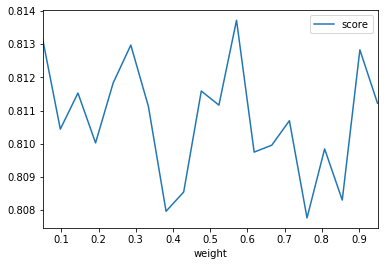

In [21]:
grid_result = gsc.fit(rescaledX_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
#prec_score_rf = metrics.precision_score(grid_result.actual, grid_result.predicted,average='micro')

dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
dataz.plot(x='weight')

In [22]:
randomforest_hyperparameters = {
    'randomforestclassifier__max_depth' : np.arange(5,10),
    'randomforestclassifier__n_estimators' : [50,100],
    'randomforestclassifier__max_features' : np.arange(5,6),
    #'randomforestclassifier__max_leaf_nodes' : [5,10,15,20,25,30],
    #'randomforestclassifier__min_samples_split' : np.arange(2, 15),
    "randomforestclassifier__min_samples_leaf" : np.arange(2,10),
    "randomforestclassifier__criterion": ["gini", "entropy"],
   #"randomforestclassifier__oob_score" : ["True"],
    #'randomforestclassifier__n_jobs' : [-1],
    'randomforestclassifier__class_weight' :[{0: 0.18844736842105264, 1: 0.18844736842105264},{0: 0.11028947368421052, 1: 0.11028947368421052},{0: 0.1728157894736842, 1: 0.1728157894736842}]}

In [23]:
#Create a cross validation object from random forest classifier and it's hyperparameters
rfclass_model = GridSearchCV(pipelines['rfclass'],randomforest_hyperparameters,cv=6, n_jobs=-1)
#dtclass_model = RandomizedSearchCV(pipelines['dtclass'],decisiontree_hyperparameters,cv=5, n_jobs=-1)

In [ ]:
#fit the model
rfclass_model.fit(rescaledX_train, y_train)

In [ ]:
#display the best parameters for random forest classifier model
rfclass_model.best_params_

In [ ]:
#best score for the model
rfclass_model.best_score_*100

In [ ]:
#In Pipeline we can use the string names to get the random forest classifer

rfclass_best_model = rfclass_model.best_estimator_.named_steps['randomforestclassifier']
rfclass_best_model

In [ ]:
y_pred_ = rfclass_best_model.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of random forest classifier: ",rfclass_best_model.score(rescaledX_test,y_test))

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_))

In [73]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [74]:
y_pred_

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
test_ = test.drop('ID',axis=1)
test_ = scaler.fit_transform(test_)
test_pred = rfclass_best_model.predict(test_)
ID = test['ID']
submission_df = pd.DataFrame({'ID':ID,'Is_Lead':test_pred})

In [50]:
from functools import partial


def corr_heatmap(dataframe, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                 **kwargs):
    """
    :param dataframe: a pandas DataFrame
    :param cmap: color map to feed into sns.heatmap
    :param kwargs: kwargs to feed into sns.heatmap
    :return: fig, ax
    """
    corr = dataframe.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    # np.triu_indices_from returns the indices for the upper-triangle of mask
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    masked_heatmap = partial(sns.heatmap, mask=mask, cmap=cmap, vmax=0.3,
                             center=0, linewidths=0.5, square=True,
                             cbar_kws={"shrink": 0.5})
    ax = masked_heatmap(corr, **kwargs)
    return fig, ax

(<Figure size 792x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f65dd150940>)

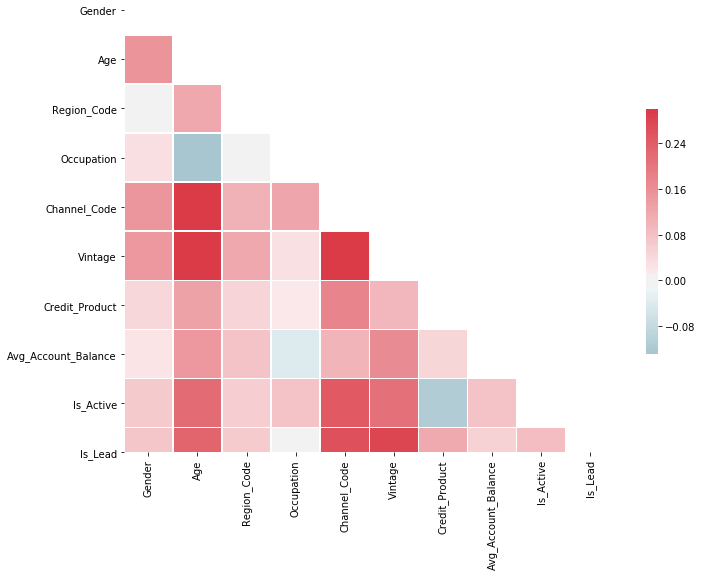

In [52]:
corr_heatmap(train)